# kaypoint Project

## Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. INN Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* Booking_ID: unique identifier of each booking
* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## Importing necessary libraries and data

In [1]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import ploty
import plotly.express as px

#import statistical libaries
import scipy.stats as stats

# Library to split data
from sklearn.model_selection import train_test_split

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To build model for prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import LogisticRegression

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    plot_confusion_matrix,
    make_scorer,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
)

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# read the data
ds = pd.read_csv('/content/drive/MyDrive/Python Project/INNHotelsGroup.csv')

## Data Overview

- Observations
- Sanity checks

In [4]:
# copying data to another variable to avoid any changes to original data
data = ds.copy()

In [5]:
# view the first 5 rows
data.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [6]:
# view the last 5 rows
data.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [7]:
#check the shape of the dataframe
data.shape

(36275, 19)

In [8]:
print('The dataframe has', data.shape[0], 'rows and', data.shape[1],'columns.')

The dataframe has 36275 rows and 19 columns.


In [9]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

### Observation:
* There are 19 columns with 36275 total entries with no misssing values as can be seen from number of non-null values.
* There are 5 object datatype columns, 1 float column and 13 integer columns.

In [10]:
# checking for duplicate values
data[data.duplicated()].count()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Observation:
* The dataset does not contain any duplicated rows or entries.

In [11]:
# drop booking_id column as it does not impact our dataset
data.drop(["Booking_ID"], axis=1, inplace=True)

In [12]:
# Check if the column Booking_ID has been dropped
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


### Observation:
* The column Booking_ID has been dropped.

In [13]:
# Check the statistical summary of the data
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [14]:
# check the count of all categorical values in each categorical variable
# first make a list of all categorical variables 
cat_cols=['type_of_meal_plan','room_type_reserved','market_segment_type','booking_status']
# using for loop
for column in cat_cols:
  print(data[column].value_counts())
  print('_'*40)

Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: type_of_meal_plan, dtype: int64
________________________________________
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64
________________________________________
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: market_segment_type, dtype: int64
________________________________________
Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64
________________________________________


## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

In [15]:
# define function to combine boxplot and histogram on the same scale
def histogram_boxplot(ds, feature, figsize=(10, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    ds: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    # Number of rows of the subplot grid= 2, and x-axis will be shared among all subplots when sharex= True
    f, (ax_box, ax_hist) = plt.subplots(nrows=2, sharex=True,gridspec_kw={"height_ratios": (0.25, 0.75)},figsize=figsize,)
    # create the 2 subplots 
    sns.boxplot(data=ds, x=feature, ax=ax_box, showmeans=True, color="violet")
    sns.histplot(data=ds, x=feature, kde=kde, ax=ax_hist, bins=bins) if bins else sns.histplot(data=ds, x=feature, kde=kde, ax=ax_hist)
    # Create the histogram and add the mean and median
    ax_hist.axvline(ds[feature].mean(), color="green", linestyle="--") 
    ax_hist.axvline(ds[feature].median(), color="black", linestyle="-") 

In [16]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    ds: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = ds[feature].nunique()
    if n is None:
        plt.figure(figsize=(count+2,6))
    else:
        plt.figure(figsize=(n+2,6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=ds,
        x=feature,
        palette="Paired",
        order=ds[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  

In [17]:
### function to plot distributions wrt target

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [18]:
def stacked_barplot(data, predictor, target, perc=False):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
  
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5,))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### 1. What are the busiest months in the hotel?

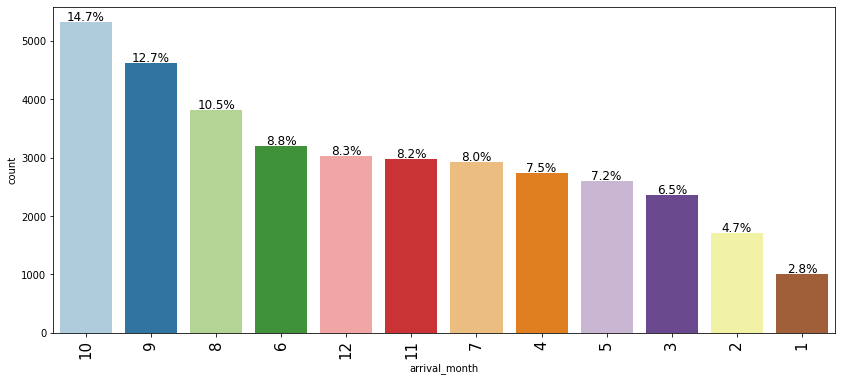

In [19]:
labeled_barplot(data, 'arrival_month', perc=True, n=None)

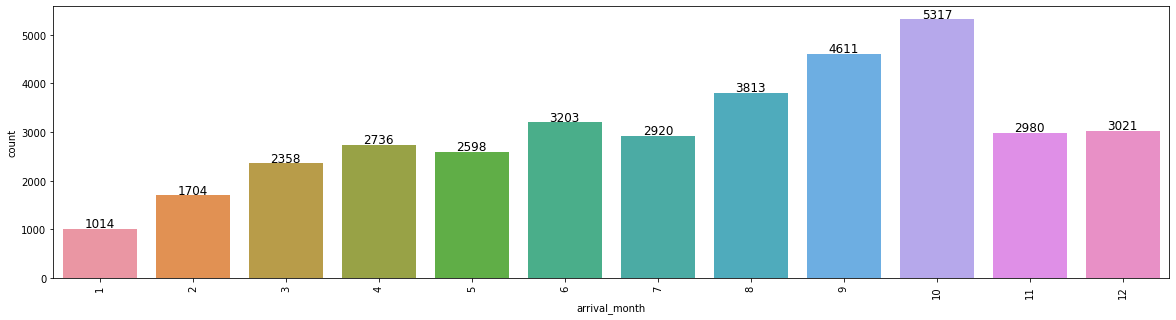

In [20]:
plt.figure(figsize=(20,5))

ax = sns.countplot(data = data.sort_values("arrival_month", ascending=True), x = "arrival_month");
plt.xticks(rotation=90)
for p in ax.patches:
 label = p.get_height()  # count of each level of the category

 x = p.get_x() + p.get_width() / 2  # width of the plot
 y = p.get_height()  # height of the plot

    
 ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the number
plt.show()

### Observation:
* The busiest month in the year is October with 14.7% (5317) bookings being in the month of October. This is followed by September with12.7% of all bookings being in the month of September.

### 2. Which market segment do most of the guests come from?

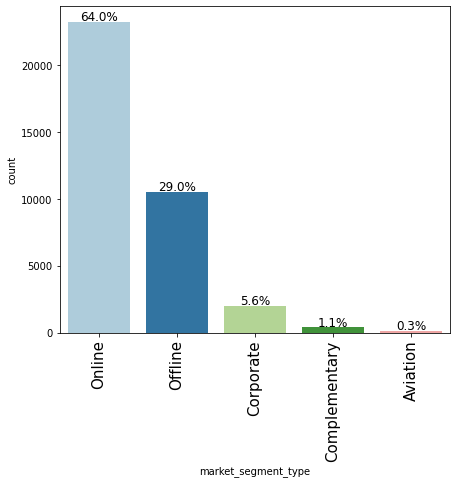

In [21]:
labeled_barplot(data, 'market_segment_type', perc=True, n=None)

### Observation:
* Majority of the guests (64% ) come from the online market segment followed by the offline market segment(29%)

### 3. What are the differences in room prices in different market segments?

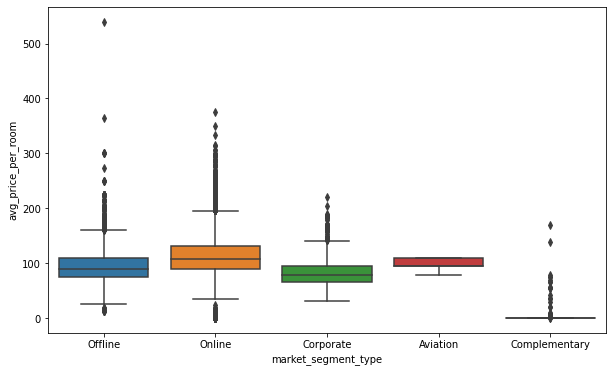

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=data, x="market_segment_type", y="avg_price_per_room"
)
plt.show()

### Observation:
* Online market segment has the highest prices per room followed by the offline market segment.

### 4. What percentage of bookings are canceled?

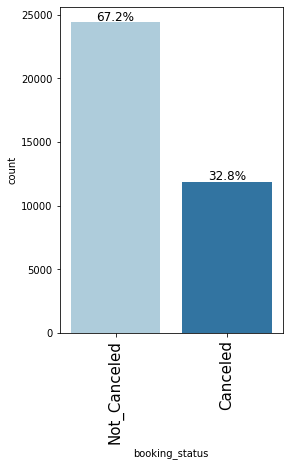

In [23]:
labeled_barplot(data, 'booking_status', perc=True, n=None)

### Observation:
* The percentage of bookings canceled is 32.8%

### 5.What percentage of repeating guests cancel?

booking_status  Canceled  Not_Canceled    All
repeated_guest                               
All                11885         24390  36275
0                  11869         23476  35345
1                     16           914    930
------------------------------------------------------------------------------------------------------------------------


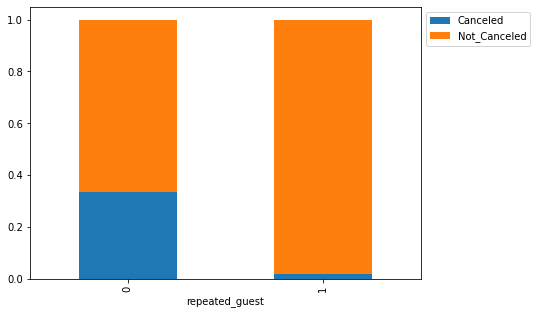

In [24]:
stacked_barplot(data,'repeated_guest','booking_status')

### Observation:
* Likelyhood of cancellation by a first time guest is significantly higher than that of a repeating guest as the likelyhood of cancelation by a repeating guets is very very low.

### 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        11885         24390  36275
0                           8545         11232  19777
1                           2703          8670  11373
2                            637          3727   4364
3                              0           675    675
4                              0            78     78
5                              0             8      8
------------------------------------------------------------------------------------------------------------------------


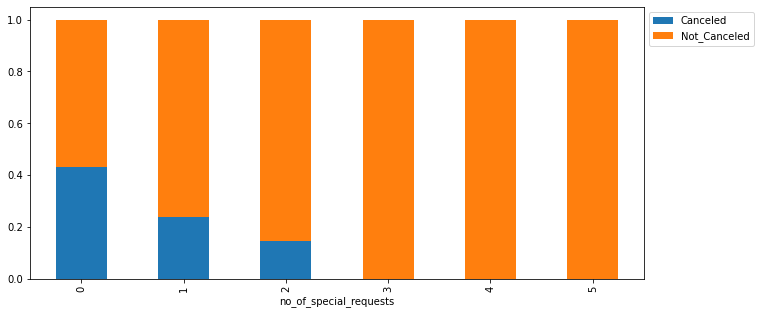

In [25]:
stacked_barplot(data,'no_of_special_requests','booking_status')

### Observation:
* The absence of special request increases the likelihood of cancellation, the addition of special request reduces the likelihood of cancellation at one and progressively reduces cancellation to Zero by the 3rd request.



## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [26]:
# check for missing values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

### Observation:
* There are no missing values.

###  Outlier detection and treatment

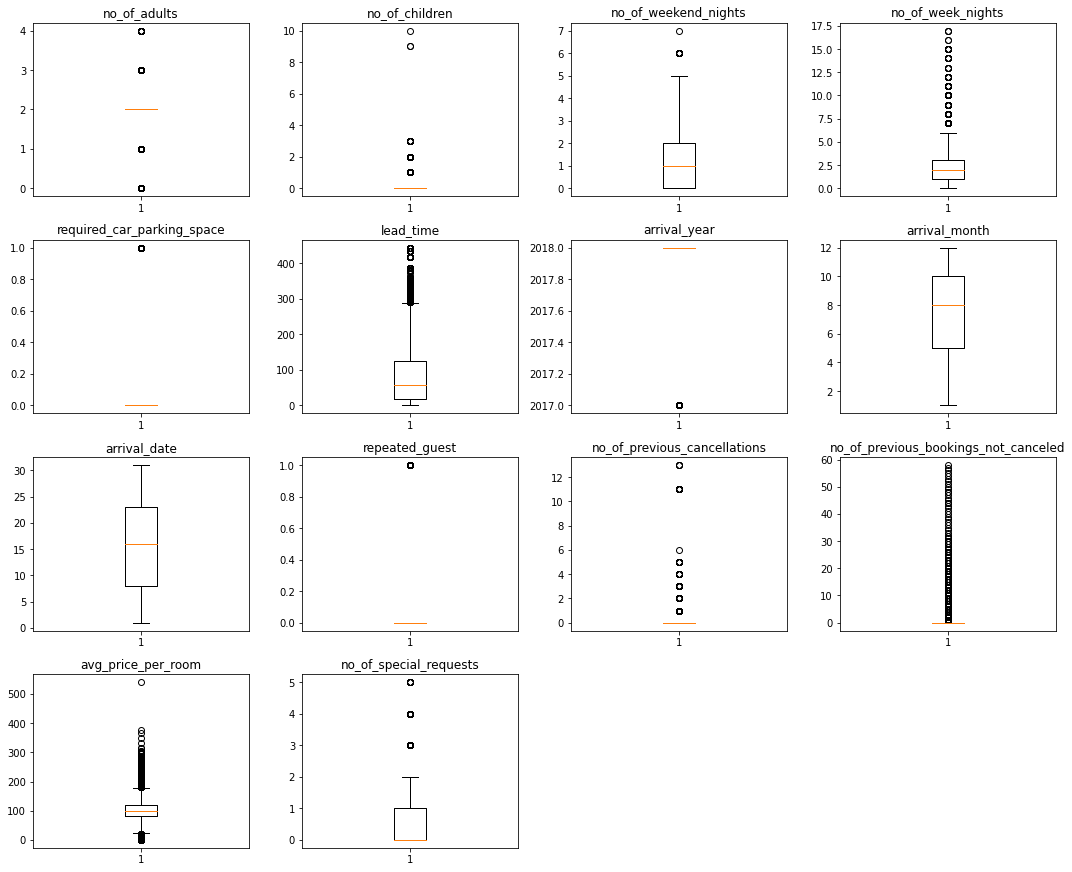

In [27]:
# outlier detection 
plt.figure(figsize=(15, 15))

for i, variable in enumerate(data.select_dtypes(include=np.number).columns.tolist()):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Observation:
* We will not be treating any outliers 

 ### Preparing data for modeling 

In [28]:
data_1 = data.copy()

In [29]:
data_1.loc[data['booking_status']=='Not_Canceled','booking_status'] = False
data_1.loc[data['booking_status']=='Canceled','booking_status'] = True

In [30]:
# create dummy variables
dummy= pd.get_dummies (data_1,columns = ['type_of_meal_plan','room_type_reserved','market_segment_type'],drop_first=True)
dummy.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
0,2,0,1,2,0,224,2017,10,2,0,0,0,65.00,0,False,0,0,0,0,0,0,0,0,0,0,0,1,0
1,2,0,2,3,0,5,2018,11,6,0,0,0,106.68,1,False,0,0,1,0,0,0,0,0,0,0,0,0,1
2,1,0,2,1,0,1,2018,2,28,0,0,0,60.00,0,True,0,0,0,0,0,0,0,0,0,0,0,0,1
3,2,0,0,2,0,211,2018,5,20,0,0,0,100.00,0,True,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2,0,1,1,0,48,2018,4,11,0,0,0,94.50,0,True,0,0,1,0,0,0,0,0,0,0,0,0,1


In [31]:
dummied = pd.cut(dummy['lead_time'], 5, labels=['lat_min','short','med','long','advanced'])
dummied.head(10)

0        med
1    lat_min
2    lat_min
3        med
4    lat_min
5       long
6    lat_min
7    lat_min
8      short
9    lat_min
Name: lead_time, dtype: category
Categories (5, object): ['lat_min' < 'short' < 'med' < 'long' < 'advanced']

In [32]:
data_2 = pd.merge(dummy,dummied, left_index=True, right_index=True)

In [33]:
# dropping time variables and lead_time_x since it has been binned into 5 columns.
data_3 = data_2.drop(['lead_time_x','arrival_date', 'arrival_year'], axis=1)

In [34]:
data_4 = pd.get_dummies (data_3,columns = ['lead_time_y',  ],drop_first=True,)

In [35]:
data_4 = data_4.astype(float)

In [36]:
X = data_4.drop(["booking_status"], axis=1)
Y = data_4["booking_status"]

In [37]:
# adding a constant to the independent variables
X = sm.add_constant(X)

In [38]:
# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)
X.head()

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_month,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Meal Plan 3,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online,lead_time_y_short,lead_time_y_med,lead_time_y_long,lead_time_y_advanced
0,1.0,2.0,0.0,1.0,2.0,0.0,10.0,0.0,0.0,0.0,65.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,2.0,0.0,2.0,3.0,0.0,11.0,0.0,0.0,0.0,106.68,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,2.0,1.0,0.0,2.0,0.0,0.0,0.0,60.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,2.0,0.0,0.0,2.0,0.0,5.0,0.0,0.0,0.0,100.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,1.0,2.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,94.50,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 29 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   const                                 36275 non-null  float64
 1   no_of_adults                          36275 non-null  float64
 2   no_of_children                        36275 non-null  float64
 3   no_of_weekend_nights                  36275 non-null  float64
 4   no_of_week_nights                     36275 non-null  float64
 5   required_car_parking_space            36275 non-null  float64
 6   arrival_month                         36275 non-null  float64
 7   repeated_guest                        36275 non-null  float64
 8   no_of_previous_cancellations          36275 non-null  float64
 9   no_of_previous_bookings_not_canceled  36275 non-null  float64
 10  avg_price_per_room                    36275 non-null  float64
 11  no_of_special_r

In [40]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (25392, 29)
Shape of test set :  (10883, 29)
Percentage of classes in training set:
0.0    0.670644
1.0    0.329356
Name: booking_status, dtype: float64
Percentage of classes in test set:
0.0    0.676376
1.0    0.323624
Name: booking_status, dtype: float64


## EDA

- It is a good idea to explore the data once again after manipulating it.

### Observations on lead time

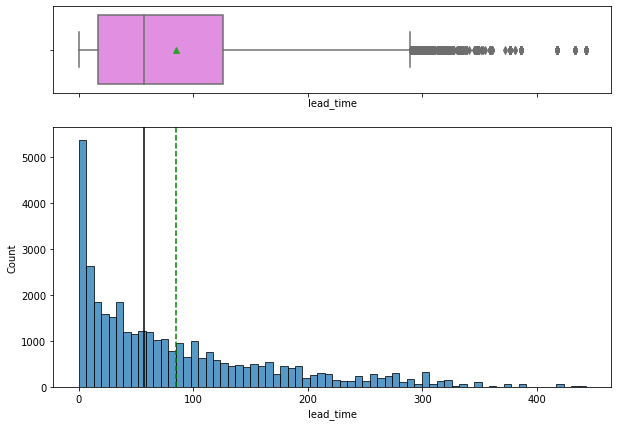

In [41]:
histogram_boxplot(data, "lead_time")

### Observation:
* The distribution of lead time is heavily right skewed with a median of about 80days.

### Observations on number of adults

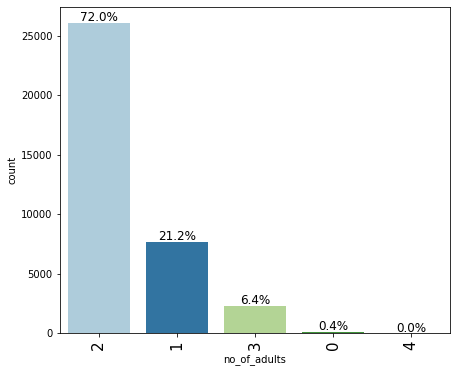

In [42]:
labeled_barplot(data, "no_of_adults", perc=True)

### Observation:
* 72% of bookings are made for 2 adults per room while 21.2% are made for 3 adults per room.

### Observations on number of children

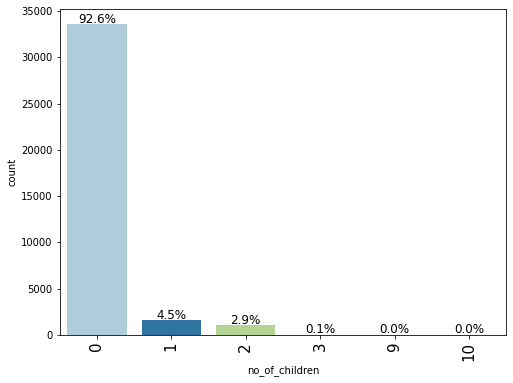

In [43]:
labeled_barplot(data, "no_of_children", perc=True)

### Observation:
* 92% of guests do not come with children and 4.5% come with just one child.

### Observations on number of week nights

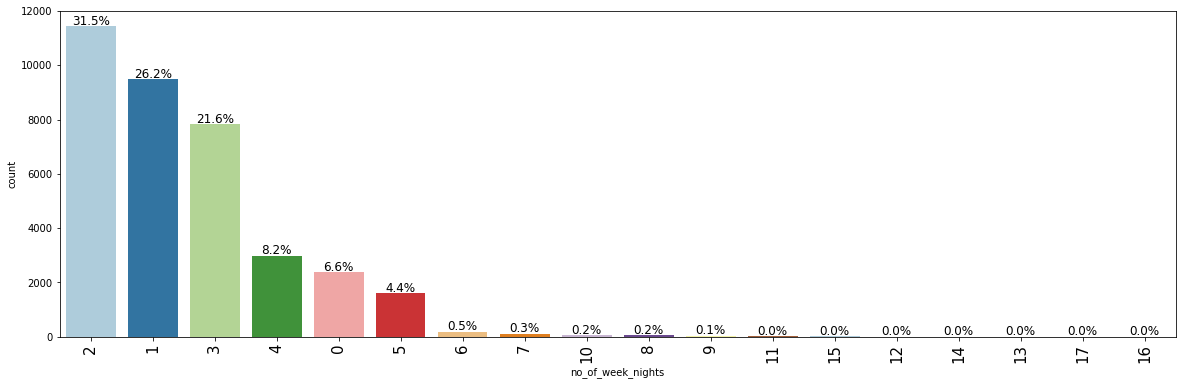

In [44]:
labeled_barplot(data, 'no_of_week_nights', perc=True)

### Observation:
* Most guests book for about 1-3nights during the weekdays.

### Observations on number of weekend nights

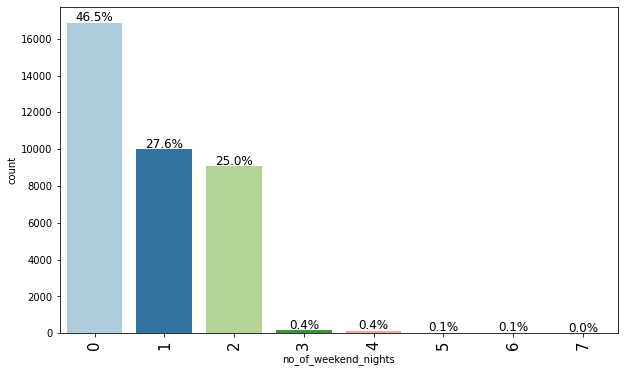

In [45]:
labeled_barplot(data, 'no_of_weekend_nights', perc=True)

### Observations on required car parking space

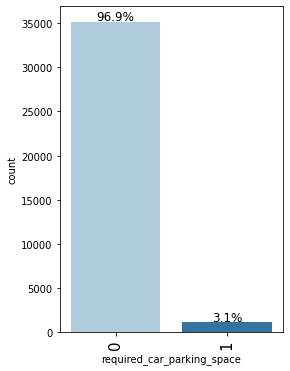

In [46]:
labeled_barplot(data, 'required_car_parking_space', perc=True)

### Observation:
* ~ 97% of guests required car parking spaces.

### Observations on type of meal plan

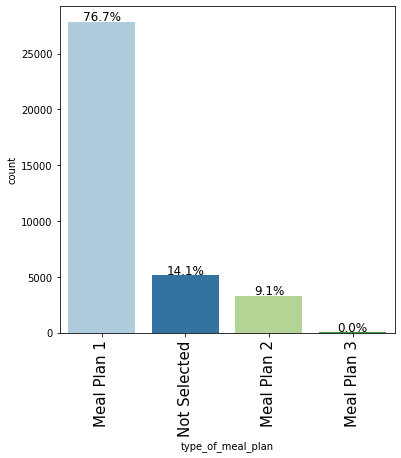

In [47]:
labeled_barplot(data, 'type_of_meal_plan', perc=True)

### Observation:
* Majority of the guests opted for meal plan 1.

### Observations on room type reserved

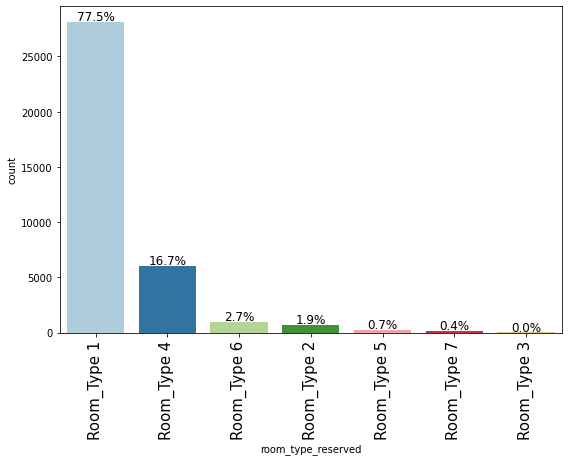

In [48]:
labeled_barplot(data, 'room_type_reserved', perc=True)

### Observation:
* Majority of the guests opted for room type 1.

### Bivariate Analysis

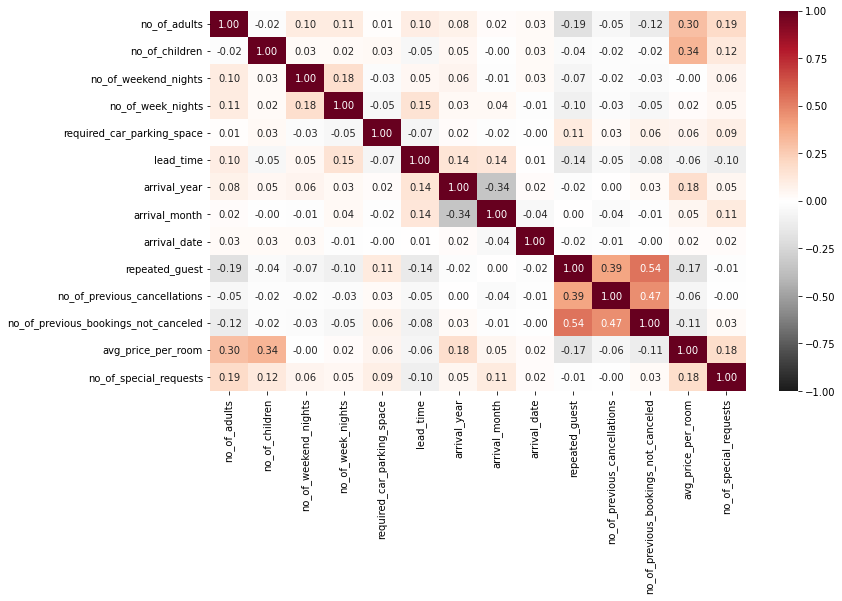

In [49]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="RdGy_r"
)
plt.show()

### Observation:
* The correlation between repeated guests and number of previous bookings not cancelled is the highest at 0.54 correlation coefficient.

### Let's analyze the correlation between booking status and average price per room. 

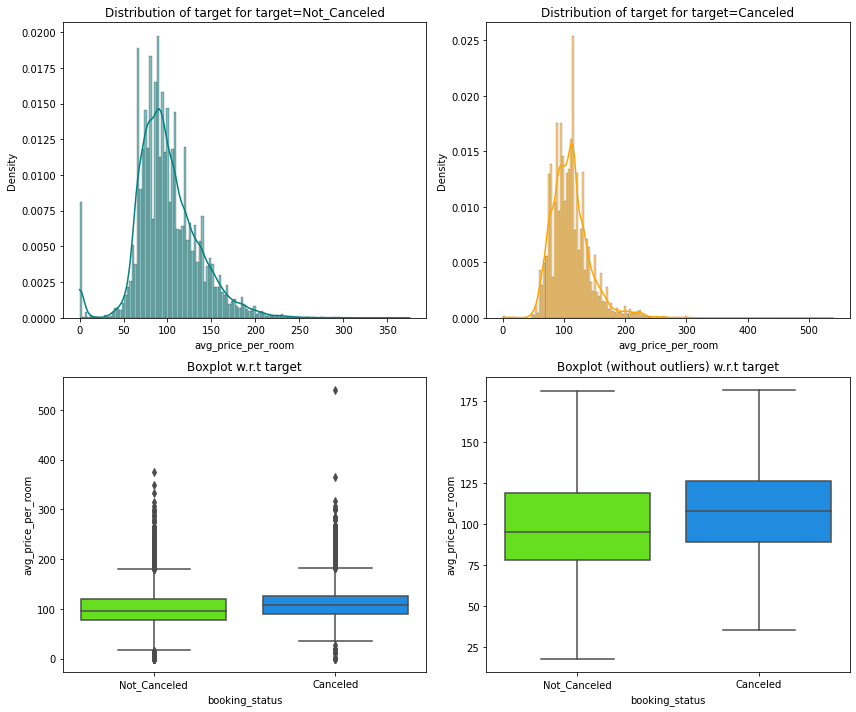

In [50]:
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

###  Let's analyze the correlation between booking status and lead time.

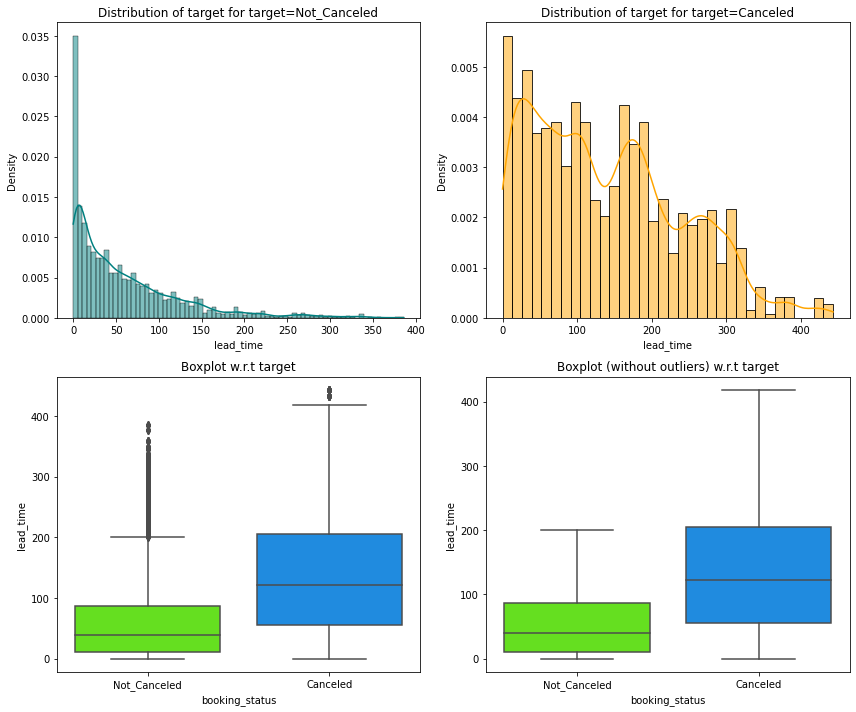

In [51]:
distribution_plot_wrt_target(data, "lead_time", "booking_status")

### Observation:
* Majority of the cancellations happen when the lead time is above 120 days, which can lead us to conclude that the longer the lead time of booking, the higher the chances of cancellation.

###  Let's see how the prices vary across different months

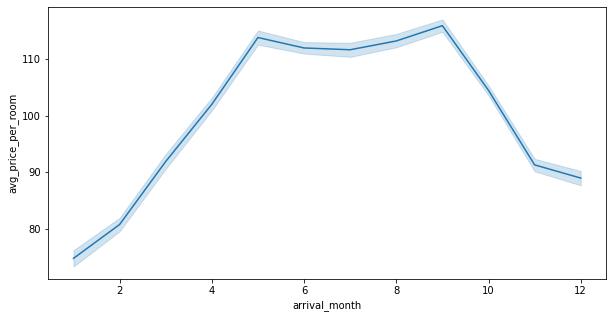

In [52]:
# create lineplot between average price per room and arrival month
plt.figure(figsize=(10, 5))
sns.lineplot(data=data, x='arrival_month', y='avg_price_per_room') 
plt.show()

### Observation:
* The prices of rooms is the highest in October which is also the busiest time of the year.

## Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [53]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                   326.161960
no_of_adults                              1.342545
no_of_children                            1.979108
no_of_weekend_nights                      1.072832
no_of_week_nights                         1.097235
required_car_parking_space                1.039635
arrival_month                             1.054804
repeated_guest                            1.779991
no_of_previous_cancellations              1.394784
no_of_previous_bookings_not_canceled      1.647425
avg_price_per_room                        1.931096
no_of_special_requests                    1.246077
type_of_meal_plan_Meal Plan 2             1.211553
type_of_meal_plan_Meal Plan 3             1.025200
type_of_meal_plan_Not Selected            1.233767
room_type_reserved_Room_Type 2            1.102214
room_type_reserved_Room_Type 3            1.003311
room_type_reserved_Room_Type 4            1.361313
room_type_reserved_Room_Type 5            1.027484
room_type_reserve

In [54]:
# Let's check effect of dropping market_segment_type_Offline
X_train2 = X_train.drop(["market_segment_type_Offline"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.329 
Adjusted R-squared: 0.329


* Since there is  no effect  on adj. R-squared if  'market_segment_type_Offline' column is dropped, we can remove it from the training set.

In [55]:
# Let's check effect of dropping market_segment_type_Online
X_train2 = X_train.drop(["market_segment_type_Online"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.33 
Adjusted R-squared: 0.329


* Since there is  no effect  on adj. R-squared if  'market_segment_type_Online' column is dropped, we can remove it from the training set.

In [56]:
# Let's check effect of dropping market_segment_type_Online
X_train2 = X_train.drop(["market_segment_type_Corporate"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.33 
Adjusted R-squared: 0.329


* Since there is  no effect  on adj. R-squared if  'market_segment_type_Corporate' column is dropped, we can remove it from the training set.

In [57]:
# dropping the above mentioned market segments
X_train = X_train.drop(['market_segment_type_Online',
                         'market_segment_type_Offline',
                         'market_segment_type_Corporate',
                        'market_segment_type_Complementary'],
                       axis=1)

In [58]:
# let's check the VIF of the predictors after dropping a few
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const                                   29.400770
no_of_adults                             1.282463
no_of_children                           1.970179
no_of_weekend_nights                     1.059225
no_of_week_nights                        1.087764
required_car_parking_space               1.035039
arrival_month                            1.050291
repeated_guest                           1.574485
no_of_previous_cancellations             1.376345
no_of_previous_bookings_not_canceled     1.632007
avg_price_per_room                       1.576764
no_of_special_requests                   1.127907
type_of_meal_plan_Meal Plan 2            1.134005
type_of_meal_plan_Meal Plan 3            1.018590
type_of_meal_plan_Not Selected           1.106682
room_type_reserved_Room_Type 2           1.091020
room_type_reserved_Room_Type 3           1.000854
room_type_reserved_Room_Type 4           1.314469
room_type_reserved_Room_Type 5           1.012657
room_type_reserved_Room_Type 6      

* Multicollinearity has been removed and no feature has a Vif value above 5
* The assumption for multicollinearity has been satisfied.
* We can now build the model using the new set of predictor variables.

## Building a Logistic Regression model

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [60]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [61]:
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit()

# print the logistic regression summary
print(lg.summary())

Optimization terminated successfully.
         Current function value: 0.462387
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25367
Method:                           MLE   Df Model:                           24
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.2704
Time:                        00:04:12   Log-Likelihood:                -11741.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                   -3.7347      0.

* p-value of a variable indicates if the variable is significant or not. If we consider the significance level to be 0.05 (5%), then any variable with a p-value less than 0.05 would be considered significant.

### Dealing with high p-value variables to remove the non-significant predictor variables.

In [62]:
predictors = X_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = predictors[cols]

    # fitting the model
    model =sm.Logit(y_train, X_train_aux.astype(float)).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'required_car_parking_space', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'avg_price_per_room', 'no_of_special_requests', 'type_of_meal_plan_Meal Plan 2', 'type_of_meal_plan_Not Selected', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'room_type_reserved_Room_Type 7', 'lead_time_y_short', 'lead_time_y_med', 'lead_time_y_long', 'lead_time_y_advanced']


In [63]:
X_train3 = X_train2[selected_features]

In [64]:
logit = sm.Logit(y_train, X_train3.astype(float))
lg1 = logit.fit()

# print the logistic regression summary
print(lg1.summary())

Optimization terminated successfully.
         Current function value: 0.462481
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                25392
Model:                          Logit   Df Residuals:                    25372
Method:                           MLE   Df Model:                           19
Date:                Thu, 12 Jan 2023   Pseudo R-squ.:                  0.2702
Time:                        00:04:14   Log-Likelihood:                -11743.
converged:                       True   LL-Null:                       -16091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -3.7583      0.094    -39.935     

### Coefficient interpretations

In [65]:
# converting coefficients to odds
odds = np.exp(lg1.params)

# finding the percentage change
perc_change_odds = (np.exp(lg1.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Change_odd%": perc_change_odds}, index=X_train3.columns).T

,const,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,arrival_month,repeated_guest,no_of_previous_cancellations,avg_price_per_room,no_of_special_requests,type_of_meal_plan_Meal Plan 2,type_of_meal_plan_Not Selected,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,lead_time_y_short,lead_time_y_med,lead_time_y_long,lead_time_y_advanced
Odds,0.023324,1.270588,1.375341,1.165281,1.095567,0.229691,0.937437,0.077415,1.182843,1.023547,0.315815,0.685176,2.242705,0.390363,0.324286,0.155741,3.743090,17.657368,21.234108,88.638137
Change_odd%,-97.667616,27.058848,37.534083,16.528144,9.556702,-77.030891,-6.256285,-92.258521,18.284260,2.354746,-68.418454,-31.482385,124.270549,-60.963685,-67.571354,-84.425908,274.308979,1665.736766,2023.410776,8763.813678


## Model performance evaluation

Training set performance

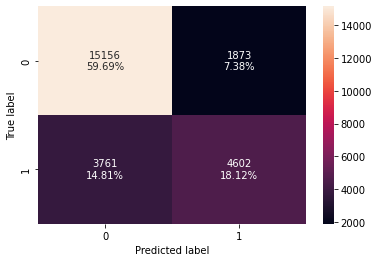

In [66]:
# create the confusion matrix
confusion_matrix_statsmodels(lg1, X_train3, y_train)

In [67]:
log_reg_model_train_perf = model_performance_classification_statsmodels(
    lg1, X_train3, y_train
)

print("Training performance:")
log_reg_model_train_perf

Training performance:


,Accuracy,Recall,Precision,F1
0,0.778119,0.550281,0.710734,0.620299


Test set performance

* We have to first drop the columns from the test set that were dropped from the training set.


In [68]:
X_test3 = X_test[list(X_train3.columns)]

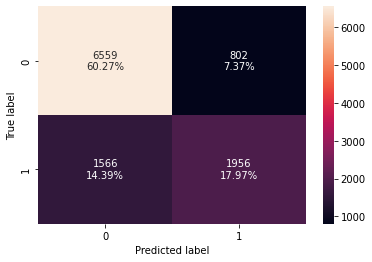

In [69]:
# create the confusion matrix
confusion_matrix_statsmodels(lg1, X_test3, y_test)

In [70]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg1, X_test3, y_test
)

print("Test performance:")
log_reg_model_test_perf

Test performance:


,Accuracy,Recall,Precision,F1
0,0.782413,0.555366,0.70921,0.62293


### Observation:
* The model has a good f1_score of ~0.620 and ~0.623 on the train and test sets respectively.
* The train and test performances are comparable, the model is not overfitting.
* Let's try to improve the performance of the model.

## Model Performance Improvement

#### ROC Curve and ROC-AUC

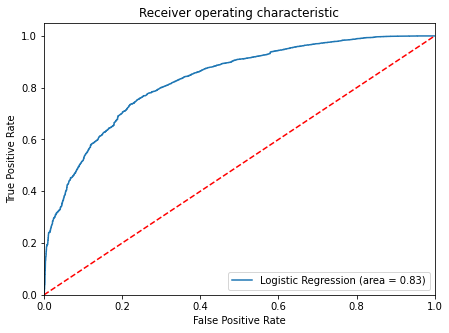

In [71]:
# ROC-AUC on training set
logit_roc_auc_train = roc_auc_score(y_train, lg1.predict(X_train3))
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

### Observation:
* Logistic Regression model is giving a good performance on training set.

#### Optimal threshold using AUC-ROC curve

In [72]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where the tpr is high and the fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg1.predict(X_train3))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.33004928312498105


Checking model performance on training set

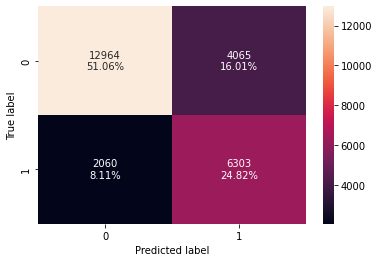

In [73]:
# creating confusion matrix
confusion_matrix_statsmodels(
    lg1, X_train3, y_train, threshold=optimal_threshold_auc_roc
)

In [74]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_train3, y_train, threshold=optimal_threshold_auc_roc
)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


,Accuracy,Recall,Precision,F1
0,0.758782,0.753677,0.607928,0.673002


* Precision of model and accuracy have slightly decreased but the other metrics have increased.
* The model is still giving a good performance.

Checking model performance on test set

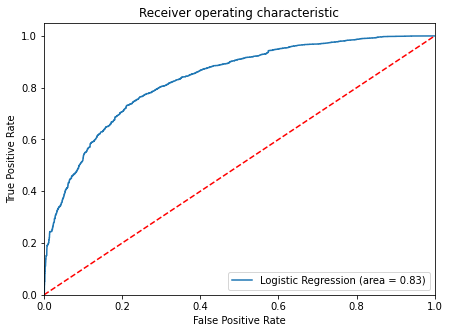

In [75]:
logit_roc_auc_train = roc_auc_score(y_test, lg1.predict(X_test3))
fpr, tpr, thresholds = roc_curve(y_test, lg1.predict(X_test3))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

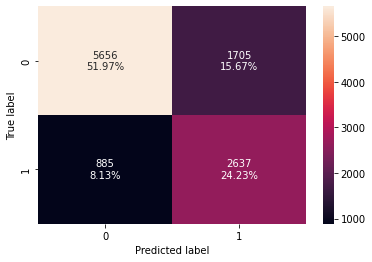

In [76]:
# create the confusion matrix
confusion_matrix_statsmodels(lg1, X_test3, y_test, threshold=optimal_threshold_auc_roc)

In [77]:
# checking model performance for this model
log_reg_model_test_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg1, X_test3, y_test, threshold=optimal_threshold_auc_roc
)
print("Test performance:")
log_reg_model_test_perf_threshold_auc_roc

Test performance:


,Accuracy,Recall,Precision,F1
0,0.762014,0.748722,0.607324,0.670651


* Precision of model and accuracy have slightly decreased but the other metrics have increased.
* The model is still giving a good performance.

### Precision-Recall Curve

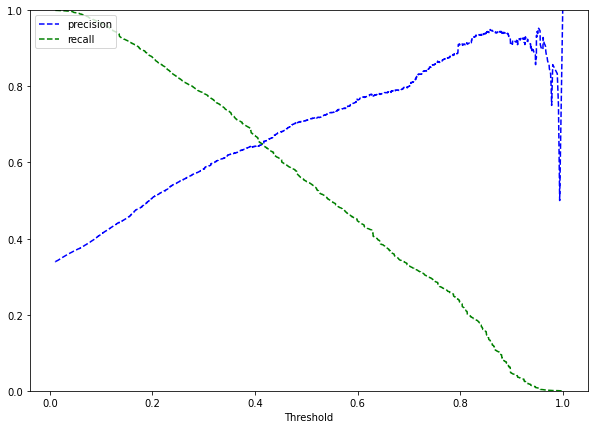

In [78]:
y_scores = lg1.predict(X_train3)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* From the above we can say that at the threshold of 0.44, we get balanced recall and precision.

In [79]:
# setting the threshold
optimal_threshold_curve = 0.44

Checking model performance on training set

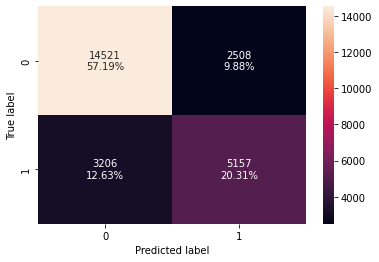

In [80]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_train3, y_train, threshold=optimal_threshold_curve)

In [81]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_train3, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


,Accuracy,Recall,Precision,F1
0,0.774968,0.616645,0.672798,0.643499


* Recall has improved as compared to the initial model.
* Accuracy remains very similar copared to initial model.
* Model is performing well on training set.


Checking model performance on test set

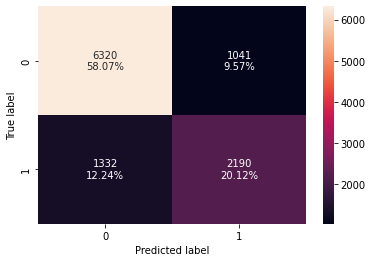

In [82]:
# creating confusion matrix
confusion_matrix_statsmodels(lg1, X_test3, y_test, threshold=optimal_threshold_curve)

In [83]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg1, X_test3, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


,Accuracy,Recall,Precision,F1
0,0.781954,0.621806,0.677809,0.648601


* Recall has improved as compared to the initial model.
* Accuracy remains very similar copared to initial model.
* Model is performing well on test set as metric valus are close to those of the training set.

## Final Model Summary

In [84]:
# training set performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.44 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.33 Threshold,Logistic Regression-0.44 Threshold
Accuracy,0.778119,0.758782,0.774968
Recall,0.550281,0.753677,0.616645
Precision,0.710734,0.607928,0.672798
F1,0.620299,0.673002,0.643499


In [85]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_auc_roc.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-default Threshold (0.5)",
    "Logistic Regression-0.33 Threshold",
    "Logistic Regression-0.44 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression-default Threshold (0.5),Logistic Regression-0.33 Threshold,Logistic Regression-0.44 Threshold
Accuracy,0.782413,0.762014,0.781954
Recall,0.555366,0.748722,0.621806
Precision,0.709210,0.607324,0.677809
F1,0.622930,0.670651,0.648601


### Observation:
* All the three models are performing well on both training and test data without the problem of overfitting
* The model with a logistic regression threshold (0.33) is giving the best F1 score. Therefore it can be selected as the final model.

## Building a Decision Tree model

In [86]:
model1 = DecisionTreeClassifier(random_state=1)
model1.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Evaluation

Checking model performance on training set

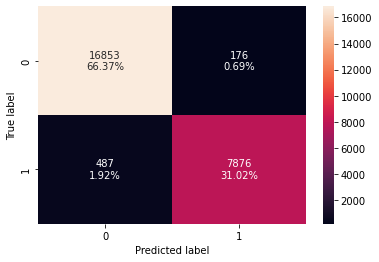

In [87]:
confusion_matrix_statsmodels(model1, X_train, y_train)

In [88]:
decision_tree_perf_train = model_performance_classification_statsmodels(
    model1, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.973889,0.941767,0.978142,0.95961


Checking model performance on test set

In [89]:
X_test1 = X_test[list(X_train.columns)]

In [90]:
decision_tree_perf_test = model_performance_classification_statsmodels(
    model1, X_test1, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.842966,0.745883,0.763441,0.75456


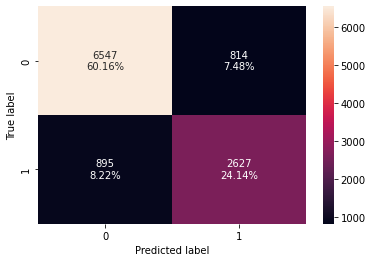

In [91]:
confusion_matrix_statsmodels(model1, X_test1, y_test)

### Decision Tree (with class_weights)

In [92]:
model2 = DecisionTreeClassifier(random_state=1, class_weight="balanced")
model2.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=1)

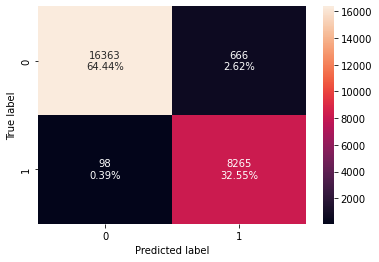

In [93]:
confusion_matrix_statsmodels(model2, X_train, y_train)

In [94]:
decision_tree_perf_train_with = model_performance_classification_statsmodels(
    model2, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,0.973889,0.941767,0.978142,0.95961


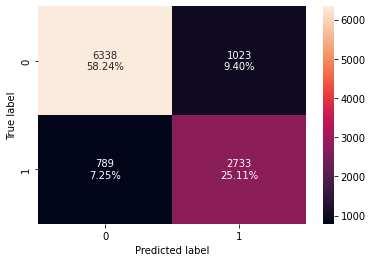

In [95]:
confusion_matrix_statsmodels(model2, X_test1, y_test)

In [96]:
decision_tree_perf_test_with = model_performance_classification_statsmodels(
    model2, X_test1, y_test
)
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.842966,0.745883,0.763441,0.75456


### Observation:
* There is a huge disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

## Do we need to prune the tree?

* Our earlier results from the metrics suggests that the model is overfitting. We would need to prune to reduce the overfitting.

### Decision Tree (Pre-pruning)

In [97]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "class_weight": [None, "balanced"],
    "max_depth": np.arange(2, 7, 2),
    "max_leaf_nodes": [50, 75, 150, 250],
    "min_samples_split": [10, 30, 50, 70],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=6, max_leaf_nodes=50,
                       min_samples_split=30, random_state=1)

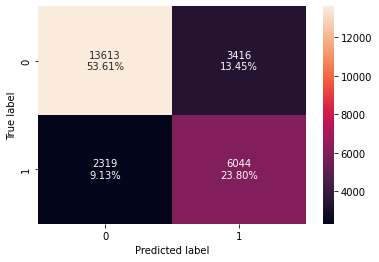

In [98]:
confusion_matrix_statsmodels(estimator, X_train, y_train)

In [99]:
decision_tree_tune_perf_train = model_performance_classification_statsmodels(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.774141,0.722707,0.638901,0.678225


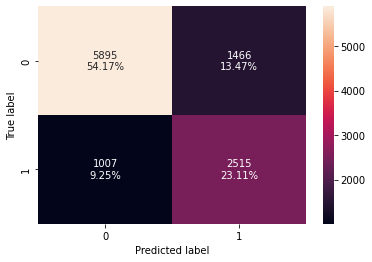

In [100]:
# test set
confusion_matrix_statsmodels(estimator, X_test1, y_test)

In [101]:
decision_tree_tune_perf_test = model_performance_classification_statsmodels(
    estimator, X_test1, y_test
)
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.772765,0.714083,0.631751,0.670399


* The model can be seen to be giving a more generalised result now as the there is no longer a huge disparity between the perfomance of the training set and test set.
* Overfitting has been reduced.

In [102]:
# Lets plot a decision tree
feature_names = list(X_train.columns)
importances = estimator.feature_importances_
indices = np.argsort(importances)

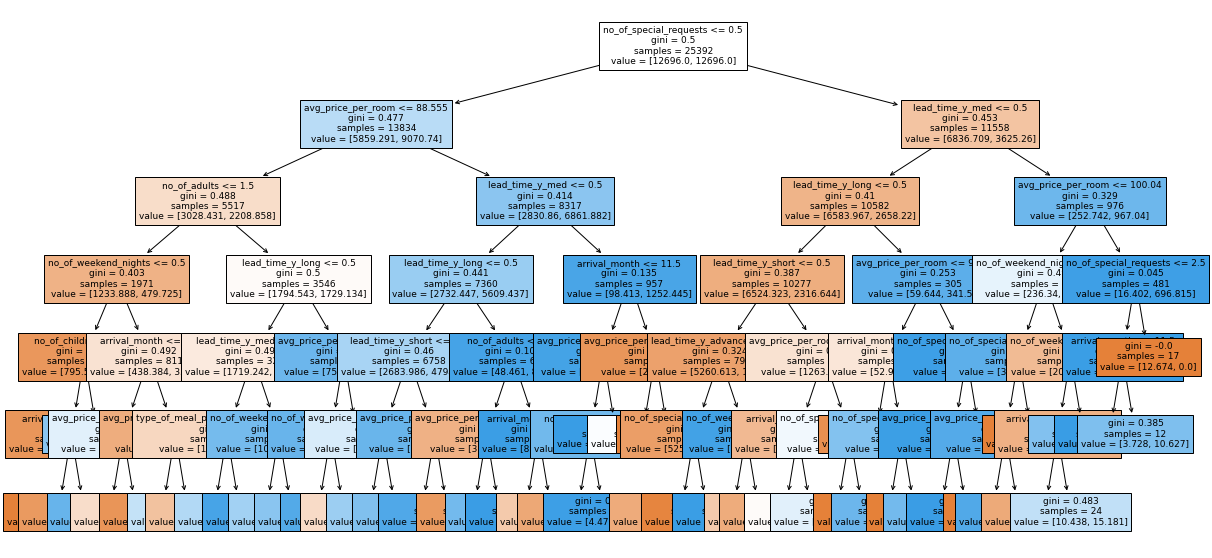

In [103]:
plt.figure(figsize=(20, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [104]:
# Text report showing the rules of a decision tree -
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- no_of_special_requests <= 0.50
|   |--- avg_price_per_room <= 88.56
|   |   |--- no_of_adults <= 1.50
|   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |--- no_of_children <= 1.50
|   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |--- weights: [118.54, 0.00] class: 0.0
|   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |--- weights: [673.23, 132.08] class: 0.0
|   |   |   |   |--- no_of_children >  1.50
|   |   |   |   |   |--- weights: [3.73, 9.11] class: 1.0
|   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |--- arrival_month <= 8.50
|   |   |   |   |   |--- avg_price_per_room <= 62.44
|   |   |   |   |   |   |--- weights: [27.59, 119.93] class: 1.0
|   |   |   |   |   |--- avg_price_per_room >  62.44
|   |   |   |   |   |   |--- weights: [196.83, 144.22] class: 0.0
|   |   |   |   |--- arrival_month >  8.50
|   |   |   |   |   |--- avg_price_per_room <= 78.67
|   |   |   |   |   |   |--- weights: [181.91, 28.84] c

### Observation:
* The tree has been pruned using the best max-depth of 6. the above is the resulting less complex decision tree.

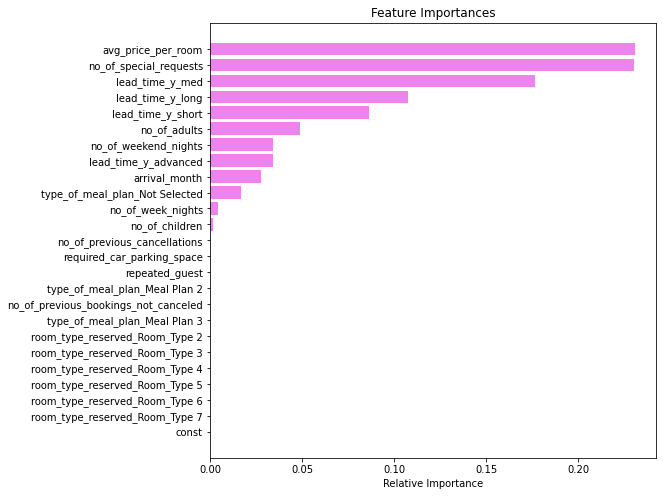

In [105]:
# importance/hierachy of features in the tree building

importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

### Decision Tree (Post pruning)

In [106]:
clf = DecisionTreeClassifier(random_state=1, class_weight="balanced")
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = abs(path.ccp_alphas), path.impurities

In [107]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000e+00,0.033398
1,-2.710505e-20,0.033398
2,0.000000e+00,0.033398
3,0.000000e+00,0.033398
4,0.000000e+00,0.033398
...,...,...
2613,7.059522e-03,0.412893
2614,1.049846e-02,0.423392
2615,2.166045e-02,0.445052
2616,2.193396e-02,0.466986


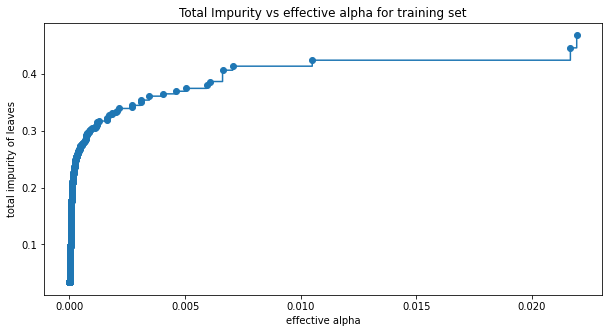

In [108]:
# Plot total impurity vs effective alpha for training set
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [109]:
# Train a decision tree using the effective alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight="balanced"
    )
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.03301398949024292


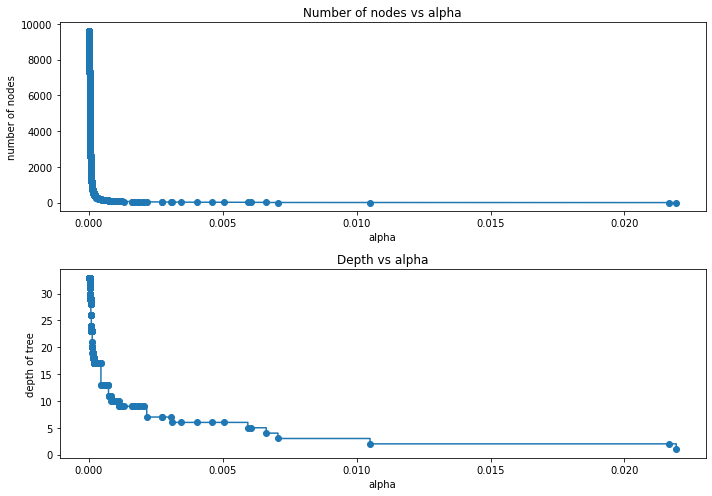

In [110]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

#### Recall vs alpha for training and test sets

In [111]:
# recall for training set
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [112]:
# recall for test set
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test1)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

In [113]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test1, y_test) for clf in clfs]

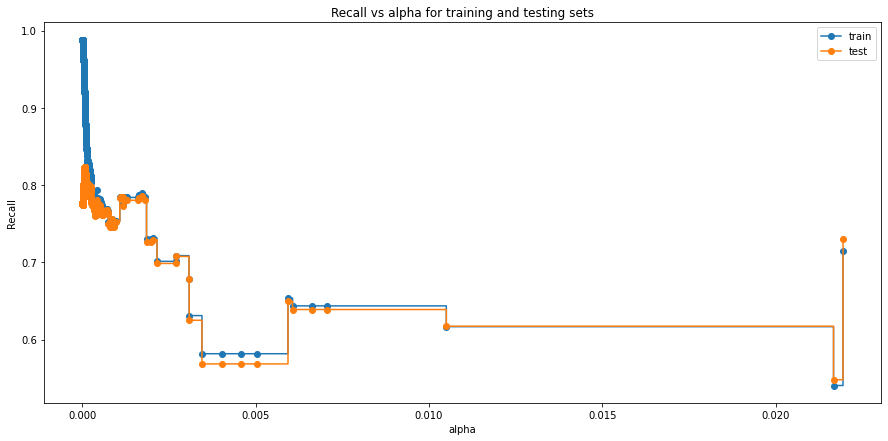

In [114]:
# plot recall vs alpha for training and test sets
fig, ax = plt.subplots(figsize=(15, 7))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [115]:
# creating the model to get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=7.237455903256031e-05, class_weight='balanced',
                       random_state=1)


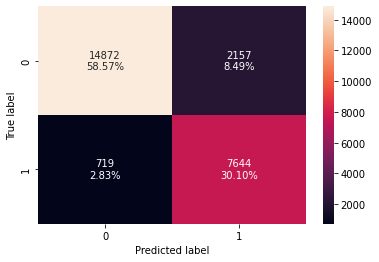

In [116]:
confusion_matrix_statsmodels(best_model, X_train, y_train)

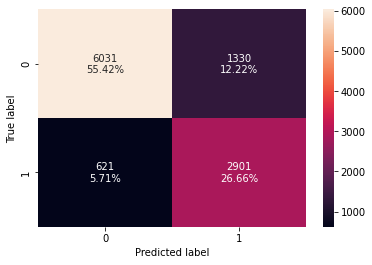

In [117]:
confusion_matrix_statsmodels(best_model, X_test1, y_test)

In [118]:
decision_tree_post_perf_train = model_performance_classification_statsmodels(
    best_model, X_train, y_train
)
decision_tree_post_perf_train

,Accuracy,Recall,Precision,F1
0,0.886736,0.914026,0.77992,0.841665


In [119]:
decision_tree_post_test = model_performance_classification_statsmodels(
    best_model, X_test1, y_test
)
decision_tree_post_test

,Accuracy,Recall,Precision,F1
0,0.82073,0.82368,0.685654,0.748355


## Visualizing the Decision Tree

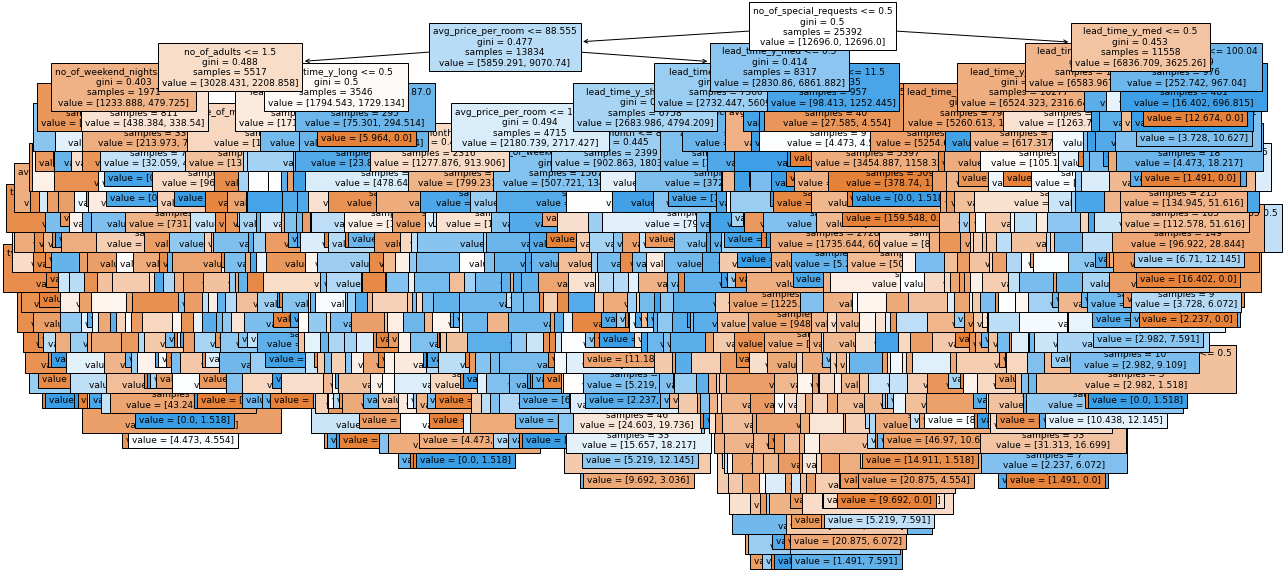

In [120]:
plt.figure(figsize=(20, 10))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [121]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- no_of_special_requests <= 0.50
|   |--- avg_price_per_room <= 88.56
|   |   |--- no_of_adults <= 1.50
|   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |--- no_of_children <= 1.50
|   |   |   |   |   |--- arrival_month <= 1.50
|   |   |   |   |   |   |--- weights: [118.54, 0.00] class: 0.0
|   |   |   |   |   |--- arrival_month >  1.50
|   |   |   |   |   |   |--- lead_time_y_short <= 0.50
|   |   |   |   |   |   |   |--- arrival_month <= 3.50
|   |   |   |   |   |   |   |   |--- avg_price_per_room <= 69.50
|   |   |   |   |   |   |   |   |   |--- weights: [48.46, 6.07] class: 0.0
|   |   |   |   |   |   |   |   |--- avg_price_per_room >  69.50
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 74.45
|   |   |   |   |   |   |   |   |   |   |--- weights: [4.47, 13.66] class: 1.0
|   |   |   |   |   |   |   |   |   |--- avg_price_per_room >  74.45
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room <= 81.79
|   |   |   |   |   |   |   |   |   |   

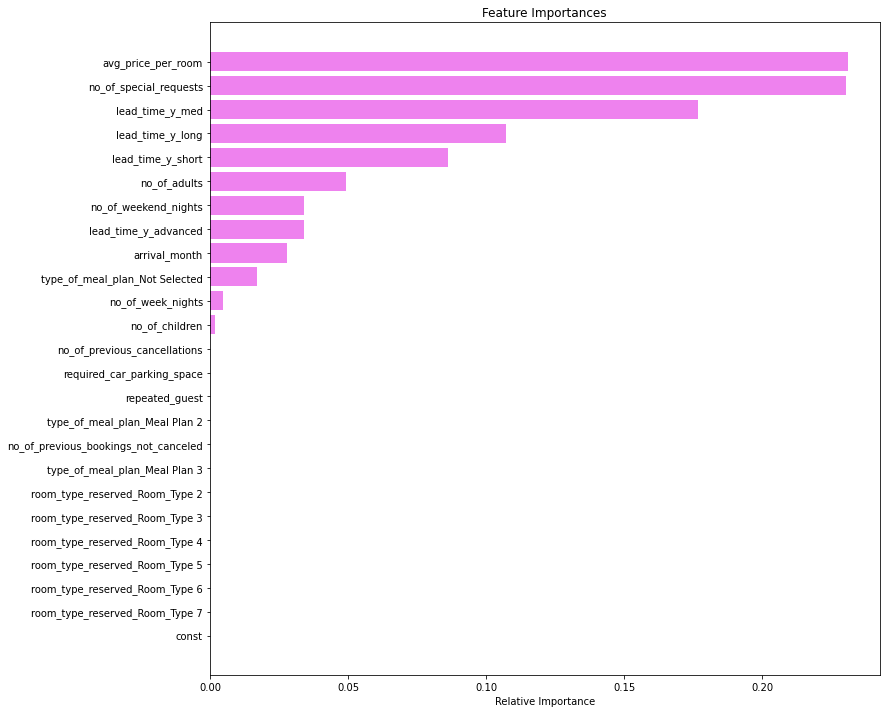

In [122]:
# importance/hierachy of features in the tree building
plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Performance Comparison and Conclusions

In [123]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train_with.T,
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_post_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree with class_weight",
    "Decision Tree without class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree with class_weight,Decision Tree without class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.969912,0.973889,0.774141,0.886736
Recall,0.988282,0.941767,0.722707,0.914026
Precision,0.925428,0.978142,0.638901,0.779920
F1,0.955823,0.959610,0.678225,0.841665


In [124]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        decision_tree_perf_test_with.T,
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_post_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree with class_weight",
    "Decision Tree without class_weight",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Decision Tree with class_weight,Decision Tree without class_weight,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.833502,0.842966,0.772765,0.820730
Recall,0.775980,0.745883,0.714083,0.823680
Precision,0.727636,0.763441,0.631751,0.685654
F1,0.751031,0.754560,0.670399,0.748355


### Observation:
* Decision tree models with post-pruning both is giving a high recall score on the training but slightly lower score on the test sets.
* However, we will choose the pre-pruned tree as the best model since it is giving good scores on all metrics onthe training set and those scores are very similar to those of thetest sets than the post-pruned tree.
* This goes to show that the fitting does well on both training and test sets and the model is not overfitting noise or underfitting.

## Actionable Insights and Recommendations

- What profitable policies for cancellations and refunds can the hotel adopt?
- What other recommedations would you suggest to the hotel?

### What profitable policies for cancellations and refunds can the hotel adopt?

* According to the EDA done there are certain factors that affect cancellations such as number of special requests, lead time,repeated guests( if guest is a repeating customer) and average price of the room. 
* the more special requests a customer makes, the lower the chances of cancelling booking. Therefore, in order to reduce cancellations, offer some attractive/luxury options as special requests options such as access to special dining areas of the hotel, special champagne options, specific rom temp settings etc for little or no addditional costs especially to those booking online.
* lead time has an effect on cancellations as the higher the lead time of booking, the higher the chances of cancellations. To reduce cancellations due to lead time,the hotel should offer discounts to those who book up to 4-5 months prior to check-in date as well as request for a deposit. This is an incentive to keep those who have booked early from cancelling as they would be getting a better deal.
* Offer occassional discounts and other incentives to repeating guests as they rarely cancel and improve the hotel's image. This incentives would also drive other customers to become repeating guests so as to tap into this reward system.


### What other recommedations would you suggest to the hotel?

* Special Offers like dinner parties and holiday themed cuisines/lounging should be offered to improve patronage during the holiday seasons.

In [125]:
!jupyter nbconvert --to html Project_SLC_DSBA_INNHotels_solution_Notebook.ipynb .ipynb

[NbConvertApp] WARNING | pattern '.ipynb' matched no files
[NbConvertApp] Converting notebook Project_SLC_DSBA_INNHotels_solution_Notebook.ipynb to html
[NbConvertApp] Writing 2377147 bytes to Project_SLC_DSBA_INNHotels_solution_Notebook.html
